In [13]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


UsageError: Line magic function `%reload` not found.


In [85]:

from algo.process.normalize import NormalizeProcessing
from algo.codec.bpca import BPCACompression
from algo.codec.brotli import BrotliLibraryCompressionAlgorithm
from algo.codec.pca import PCACompression
from algo.codec.zstd import ZstdLibraryCompressionAlgorithm
from scaffold import Scaffold
from algo.process.tobinary import ConvertToBinaryProcessing
from algo.codec.zlib import ZlibCompression
from algo.codec.dummy import DummyCompressionAlgorithm

benchmarks = []
Algos = [BPCACompression(n_components=15), PCACompression(15)]
Processes = [NormalizeProcessing()]
for algo in Algos:
    for proc in Processes:
        a = Scaffold(algo, proc, "../data/smoke_detection_iot.csv")
        a.start("test", logs=True)
        print(a.benchmark)
        benchmarks.append(a.benchmark)
        print("---------------------")

covy:  [[ 1.         -0.16417355 -0.39190692  0.18073138  0.13209967 -0.15108808
   0.16655456 -0.4343753   0.12316816  0.10530363  0.13028752  0.10369537
   0.08323378 -0.25159522 -0.38940358]
 [-0.16417355  1.         -0.24398559  0.08244183  0.07926519 -0.13554044
  -0.03734264 -0.25120265  0.03732957  0.03208418  0.03929062  0.03160811
   0.02552552 -0.08984991 -0.16390191]
 [-0.39190692 -0.24398559  1.         -0.4888779  -0.36909516  0.24719853
   0.06878211  0.6946143  -0.23653782 -0.17888169 -0.27738919 -0.17422373
  -0.11850246  0.25196461  0.39984637]
 [ 0.18073138  0.08244183 -0.4888779   1.          0.60611778 -0.65305294
  -0.67371463 -0.2200043   0.59736627  0.47742447  0.67065745  0.46738618
   0.34472109 -0.05770264 -0.21474344]
 [ 0.13209967  0.07926519 -0.36909516  0.60611778  1.         -0.68278494
  -0.50669497 -0.32604279  0.66548182  0.5726909   0.69960409  0.56425227
   0.45632289 -0.10668109 -0.09700611]
 [-0.15108808 -0.13554044  0.24719853 -0.65305294 -0.68278

In [22]:
from scaffold.json import json_scaffold
json_scaffold("plug_config.json")

KeyError: 'DummyCompressionAlgorithm'

0.3842759136297367
0.3728599367339107
[{'name': 'BPCACompression', 'table_path': '../data/smoke_detection_iot.csv', 'isLossLess': False, 'isLearning': False, 'compression_rate': 0.41197156302576315, 'preprocess_and_compress_time': 3.5237855911254883, 'loss_rate': 0.3842759136297367, 'decompress_and_postprocess_time': 1.2935974597930908, 'test_time': 4.817383050918579}, {'name': 'PCACompression', 'table_path': '../data/smoke_detection_iot.csv', 'isLossLess': False, 'isLearning': False, 'compression_rate': 0.4124621039165114, 'preprocess_and_compress_time': 1.1665902137756348, 'loss_rate': 0.3728599367339107, 'decompress_and_postprocess_time': 1.2926886081695557, 'test_time': 2.4592788219451904}]


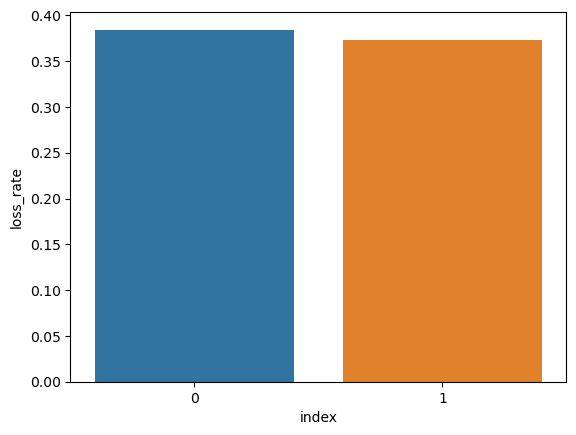

In [84]:
from plot import plot_benchmarks

plot_benchmarks(benchmarks, "loss_rate")
for i in benchmarks:
    print(i["loss_rate"])
print(benchmarks)

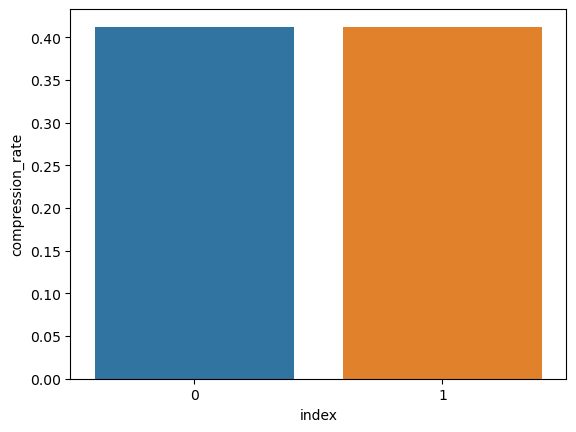

In [83]:
plot_benchmarks(benchmarks, "compression_rate")

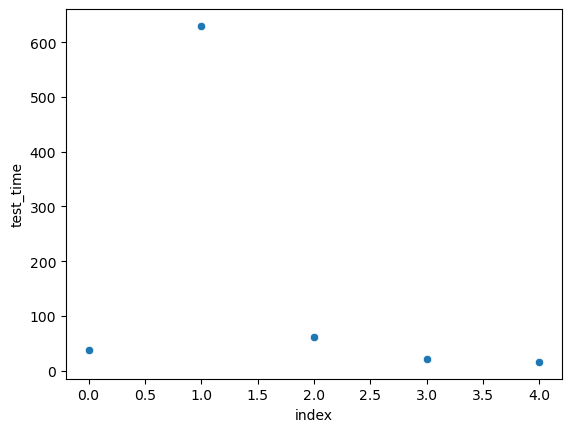

In [5]:
from plot import plot_scatter

plot_scatter(benchmarks, "test_time")

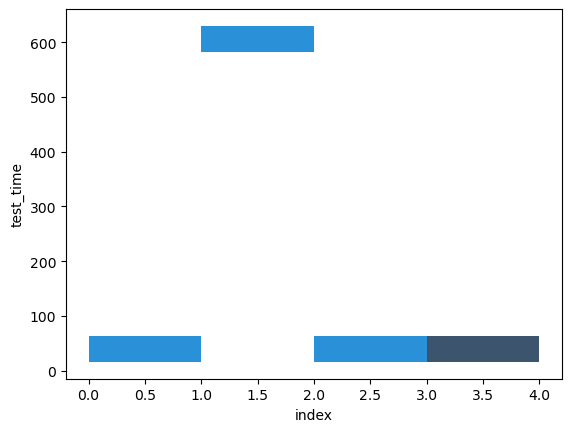

In [6]:
from plot import plot_hist

plot_hist(benchmarks, "test_time")

In [30]:
from generator.normal_multivariate import NormalMultivariateDistributionGenerator
gen = NormalMultivariateDistributionGenerator()
gen.gen([0,0], [[1, 0], [0, 1]], (2,))

array([[-1.14045995,  1.79263972],
       [-1.03952104,  1.66271905]])